##**Q-Learning: Off-Policy Temporal Difference Learning**

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from envs import Maze
from utils import plot_policy, plot_action_values,test_agent

In [12]:
np.object = object

In [2]:
env=Maze()

In [3]:
action_values = np.zeros((5,5,4))

Create the Target Policy, pi(s).

In [7]:
def target_policy(state): #Strictly greedy policy
  av = action_values[state]
  return np.random.choice(np.flatnonzero(av == av.max()))


Create the Exploratory Policy, b(s).

In [8]:
def exploratory_policy(state): #Strictly Random Policy
  return np.random.randint(4)

Plot the Value Table, Q(s,a).

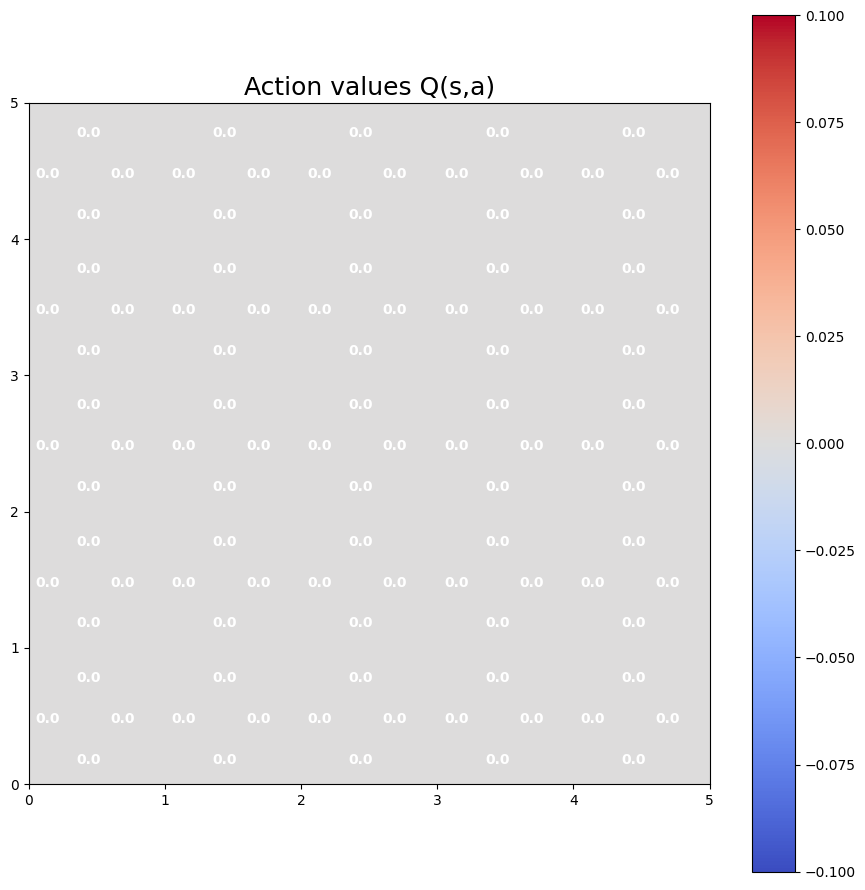

In [9]:
plot_action_values(action_values)

Plot the Policy.

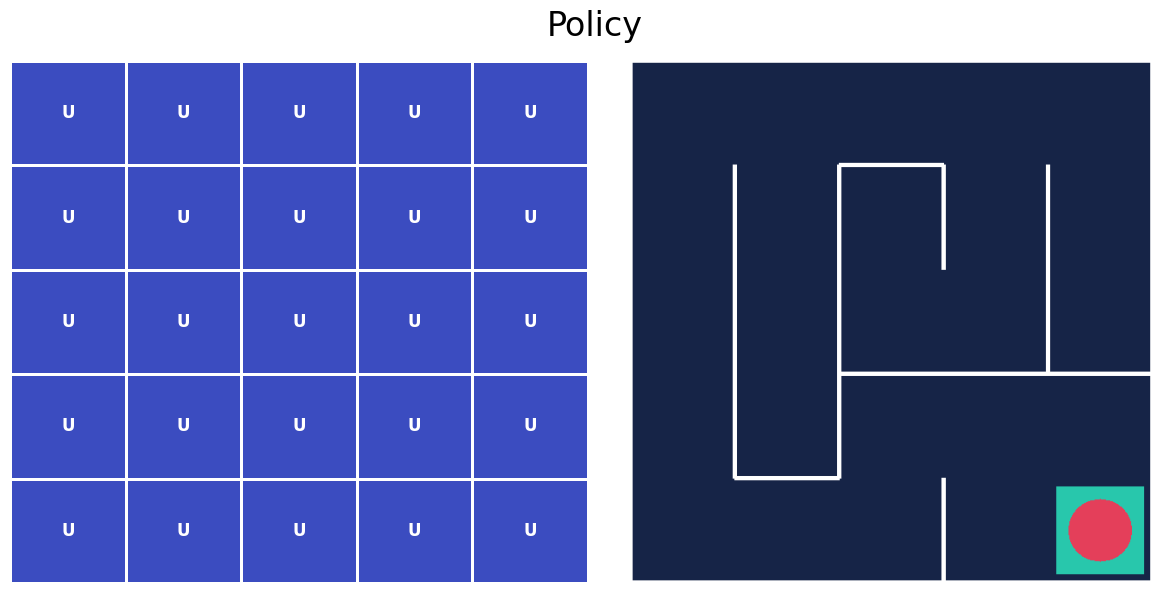

In [13]:
plot_policy(action_values, env.render(mode='rgb_array'))

Target Policy: To be referred

Behavioural Policy: To be optimized.

In [14]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):

  for episode in range(1, episodes+1):

    state = env.reset()
    done = False

    while not done:

      action = exploratory_policy(state)
      next_state, reward, done, _ = env.step(action)
      next_action = target_policy(next_state)

      qsa = action_values[state][action]
      next_qsa = action_values[next_state][next_action]

      action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

      state = next_state

In [16]:
q_learning(action_values, exploratory_policy, target_policy, 100) #100 episodes

###Show Results.

Show resulting value table Q(s,a).

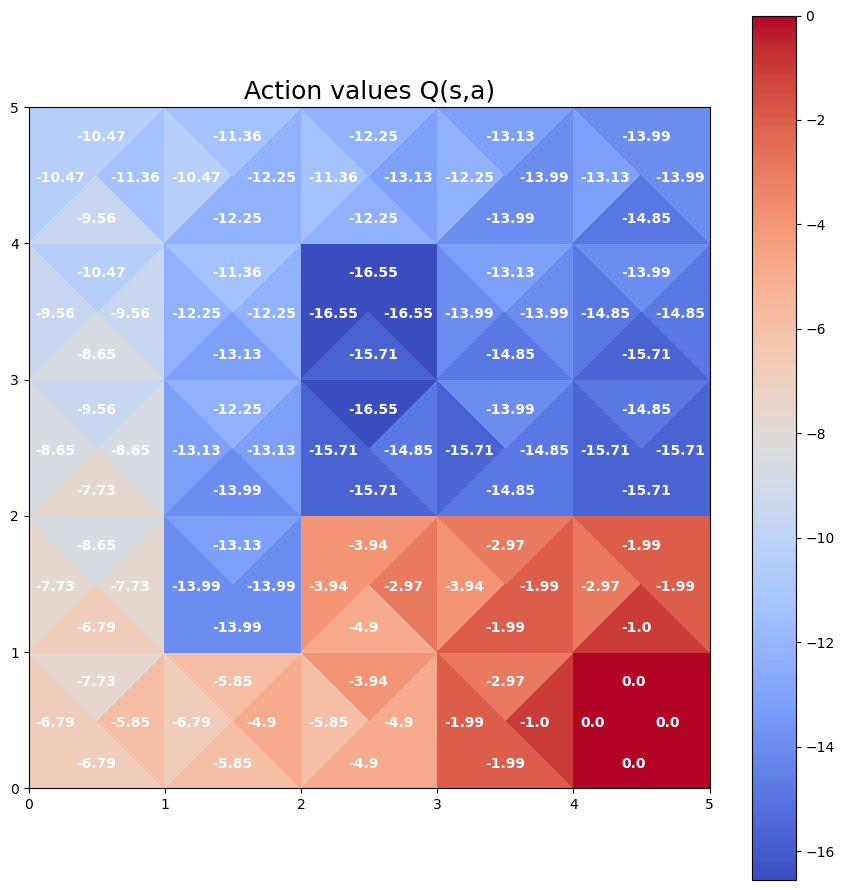

In [17]:
plot_action_values(action_values)

Show resulting policy, pi(.|s).

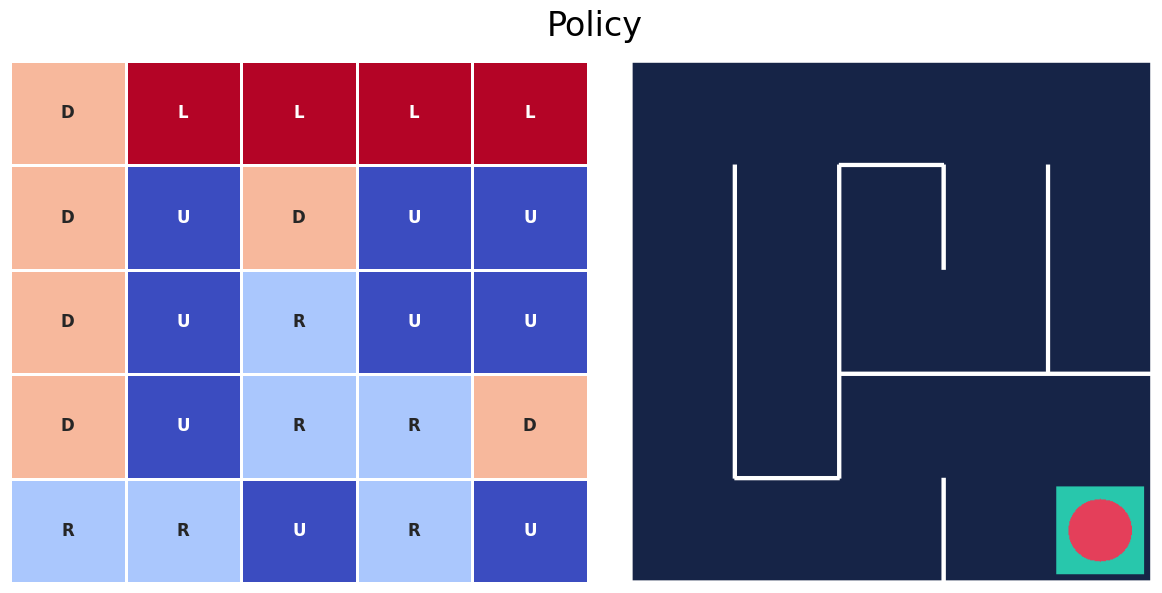

In [18]:
plot_policy(action_values, env.render(mode='rgb_array'))

Test the resulting agent.

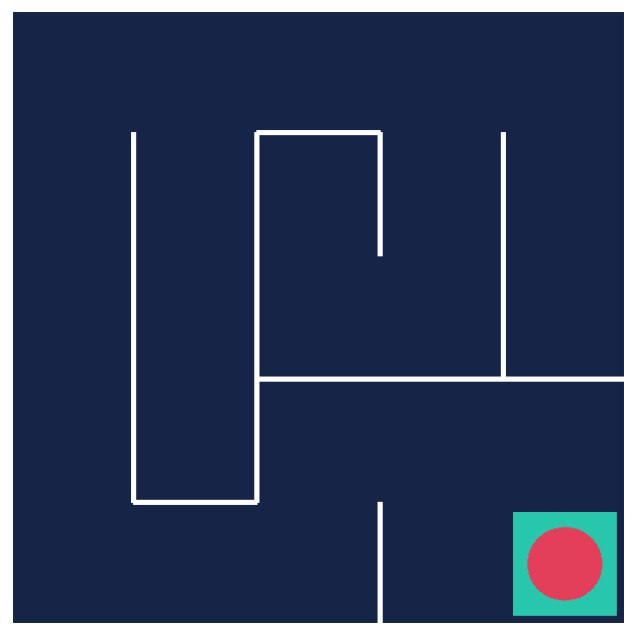

In [19]:
test_agent(env, target_policy, episodes=5)